In [0]:
import logging 
logging.getLogger("py4j").setLevel(logging.ERROR)


In [0]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

!pip install opencv-python
import cv2

!pip install requests
!pip install urllib

!pip install cmake
!pip install boost
!pip install boost-python --with-python3

!pip install dlib

!pip install face_recognition
!pip install fer

import requests
import urllib
from urllib.parse import urlparse
import dlib
import face_recognition
from fer import FER
import datetime


opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)


spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.0.1 
 Master 
 spark://10.125.226.210:7077 
 AppName 
 Databricks Shell

In [0]:
# make backups of latest data files

dbutils.fs.cp('/saved_df/face_df.csv','/archive/face_df.csv')
dbutils.fs.cp('/faces/face_np.npy','/archive/face_np.npy')


Out[4]: True

In [0]:
# delete existing image files to be replaced

In [0]:
%fs rm -r '/img_dir/' 

res0: Boolean = true

In [0]:
dbutils.fs.mkdirs('/img_dir/')

Out[6]: True

In [0]:
article_df = pd.read_csv("/dbfs/saved_df/article_df.csv", header=0, index_col=0)

date,day,domain,month,source_id,source_name,title,urlToImage,year
2020-10-23,23.0,abcnews.go.com,10.0,abc-news,ABC News,WATCH: Biden and Trump speak on institutional racism in America,https://s.abcnews.com/images/Politics/201022_abcnl_debate_race_issues_hpMain_16x9_992.jpg,2020.0
2020-10-22,22.0,abcnews.go.com,10.0,abc-news,ABC News,How will Biden deal with Trump's personal attacks at Thursday's debate?,https://s.abcnews.com/images/Politics/biden-8-abc-er-201015_1602814151696_hpMain_16x9_992.jpg,2020.0
2020-10-23,23.0,abcnews.go.com,10.0,abc-news,ABC News,5 key takeaways from the final presidential debate,https://s.abcnews.com/images/Politics/trump-biden-debate-nashville-37-rtr-jc-201022_1603419468680_hpMain_16x9_992.jpg,2020.0
2020-10-26,26.0,abcnews.go.com,10.0,abc-news,ABC News,"Jews For Trump car parade stirs protests, fights in New York",null,2020.0
2020-10-23,23.0,abcnews.go.com,10.0,abc-news,ABC News,Biden campaign seeks to clarify position on fossil fuels after debate exchange,https://s.abcnews.com/images/Politics/trump-biden-debate-nashville-12-gty-llr-201022_1603420778438_hpMain_16x9_992.jpg,2020.0
2020-10-24,24.0,abcnews.go.com,10.0,abc-news,ABC News,"Lawyer for Ivanka Trump, Jared Kushner threatens suit over 'defamatory' billboards",https://s.abcnews.com/images/Politics/ivanka-trump-jared-kushner-times-square-billboard-01-gty-llr-201024_1603557674132_hpMain_16x9_992.jpg,2020.0
2020-10-23,23.0,abcnews.go.com,10.0,abc-news,ABC News,"For Trump and Biden, debate fuels allegations of improper family foreign deals",https://s.abcnews.com/images/Politics/trump-biden-debate-nashville-24-rtr-jc-201022_1603416146080_hpMain_16x9_992.jpg,2020.0
2020-10-23,23.0,abcnews.go.com,10.0,abc-news,ABC News,Trump lifts sanctions on Sudan as he announces deal between African nation and Israel,https://s.abcnews.com/images/Politics/trump-gty-jt-201016_1602863137431_hpMain_16x9_992.jpg,2020.0
2020-10-23,23.0,abcnews.go.com,10.0,abc-news,ABC News,Fact-checking Trump and Biden during 2nd presidential debate,https://s.abcnews.com/images/Politics/trump-biden-debate-nashville-20-gty-jc-201022_1603415318798_hpMain_16x9_992.jpg,2020.0
2020-10-23,23.0,abcnews.go.com,10.0,abc-news,ABC News,WATCH: Biden and Trump discuss relief bill and minimum wage,https://s.abcnews.com/images/Politics/201022_abcnl_debate_covid_relief_hpMain_16x9_992.jpg,2020.0


In [0]:
# read images from URLs and save to image files. 

for i, x in article_df.iterrows():
    if (i % 100 == 0):
        print(i)
        
    filename = 'URL_img_' + str(i) + '.jpg'
    oldpath = 'file:/databricks/driver/' + filename
    movepath = '/img_dir/' + filename
    newpath = '/dbfs/img_dir/' + filename    

    if (x['urlToImage']):
        try: 
            urllib.request.urlretrieve(x['urlToImage'], filename)
            #move file from local path to dbfs
            dbutils.fs.mv(oldpath, movepath)
            article_df.loc[i,'image_path'] = newpath
            article_df.loc[i,'image_file'] = filename
        except:    
            print('could not load:',i,'of',article_df.shape[0])
            continue
    
# read images into Spark image dataframe
image_df = spark.read.format("image").load('/img_dir/')


0
could not load: 3 of 1118
100
200
300
400
500
600
700
800
could not load: 890 of 1118
900
could not load: 907 of 1118
1000
1100

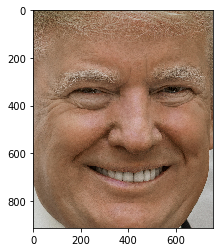

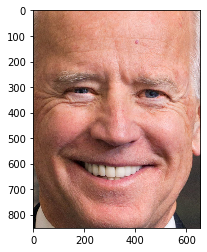

In [0]:
# links to official portraits
trump_url = 'https://upload.wikimedia.org/wikipedia/commons/5/56/Donald_Trump_official_portrait.jpg'
biden_url = 'https://upload.wikimedia.org/wikipedia/commons/f/f4/Joe_Biden_official_portrait_2013.jpg'

detector = FER(mtcnn=True)

known_faces_df = pd.DataFrame({'name':['Donald Trump',
                                       'Joe Biden'],
                               'url':['https://upload.wikimedia.org/wikipedia/commons/5/56/Donald_Trump_official_portrait.jpg',
                                      'https://upload.wikimedia.org/wikipedia/commons/f/f4/Joe_Biden_official_portrait_2013.jpg']})


known_faces_df['face'] = np.NaN
known_faces_df['face'] = known_faces_df['face'].astype(object)
known_faces_df['encoding'] = np.NaN
known_faces_df['encoding'] = known_faces_df['encoding'].astype(object)

for i,x in known_faces_df.iterrows():

    urllib.request.urlretrieve(x['url'], 'URL_img.jpg')

    image = cv2.imread('URL_img.jpg')
    img = np.float32(image)
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    boxes = detector.find_faces(img)    
    bx,by,bw,bh = boxes[0]
    x1 = bx
    x2 = bx+bw
    y1 = by
    y2 = by+bh

    face = img_rgb[y1:y2,x1:x2]

    plt.imshow(face)
    plt.show()

    encoding = face_recognition.face_encodings(face)[0]

    known_faces_df.at[i,'face'] = face
    known_faces_df.at[i,'encoding'] = encoding

In [0]:

face_list = []
face_df = pd.DataFrame()
face_np = np.array([])

for i,x in article_df.iterrows():
    if (i % 100 == 0):
        print(i)
    
    try:
        image = face_recognition.load_image_file(x['image_path'])
        
    except:
        continue
    
#     plt.imshow(image)
#     plt.show()

    try:
        face_locations = face_recognition.face_locations(image)
    except:
        continue

    for box in face_locations:
#         print(box)
        top, right, bottom, left = box
        face = image[top:bottom,left:right]
        
#         plt.imshow(face)
#         plt.show()

        face_encodings = face_recognition.face_encodings(face)

        if (face_encodings):
            matches = face_recognition.compare_faces(list(known_faces_df['encoding']),
                                                 face_encodings[0], 
                                                 tolerance=.6)

            if (sum(matches)>0):
#                 print(i,"match")
                name = known_faces_df.loc[matches,'name']
                name = name[name.index[0]]

#                 plt.imshow(face)
#                 plt.title(name)
#                 plt.show()
#                 face_list.append(face)

                face_dict = { 'name': name,
                            'source': x['source_name'],
                            'title': x['title'],
                            'urlToImage': x['urlToImage'],
                            'date': x['date'],
                            'year': x['year'],
                            'month': x['month'],
                            'day': x['day']}

                face_df = face_df.append(pd.Series(face_dict), ignore_index=True)
        
                face_list.append(face)

                              
face_np = np.array(face_list)

# t1 = datetime.now()
# print(t1-t0)




0
100
200
300
400
500
600
700
800
/databricks/python/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
 "Palette images with Transparency expressed in bytes should be "
900
1000
1100

In [0]:
print(face_df.name.value_counts()['Joe Biden'])
print(face_df.name.value_counts()['Donald Trump'])
      

154
203

In [0]:
np.save('/dbfs/faces/face_np.npy', face_np)

In [0]:
face_df.to_csv('/dbfs/saved_df/face_df.csv')

In [0]:
# Upload datafile to github repo

!pip install PyGithub
from github import Github

# ---------

git_file = 'face_df.csv'
dbfs_file = '/dbfs/saved_df/face_df.csv'

# ---------

f = open("/dbfs/github_token.txt", "r")
github_token = f.read()
f.close()

g = Github(github_token)
repo = g.get_repo("adichiara/DS504")
contents = repo.get_contents("")
all_files = []

while contents:
    file_content = contents.pop(0)
    if file_content.type == "dir":
        contents.extend(repo.get_contents(file_content.path))
    else:
        file = file_content
        all_files.append(str(file).replace('ContentFile(path="','').replace('")',''))


with open(dbfs_file, 'r') as file:
    content = file.read()

# ---------
    
commit_txt = "uploaded from Databricks."

if git_file in all_files:
    contents = repo.get_contents(git_file)
    repo.update_file(contents.path, commit_txt, content, contents.sha, branch="main")
    print(git_file + ' UPDATED')
else:
    repo.create_file(git_file, commit_txt, content, branch="main")
    print(git_file + ' CREATED')
    

face_df.csv UPDATED